# Complete Notebook

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from tensorflow.keras.applications import InceptionV3
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline 

## Initializing Parameters

In [3]:
IMAGE_SIZE = [256, 256, 3]

train_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train'
test_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test'
val_path = '/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val'

## Data Augmentation

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')


val_set = test_datagen.flow_from_directory('/kaggle/input/covid19-chest-xray-processed-dataset/Dataset/Val',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3641 images belonging to 2 classes.
Found 455 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


## InceptionV3

In [5]:
base_model_inceptionV3 = InceptionV3(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False, pooling='max')

87916544/87910968 [==============================] - 3s 0us/step


In [6]:
for layer in base_model_inceptionV3.layers:
    layer.trainable = False

## Building Model

In [7]:
x = base_model_inceptionV3.output
x = Flatten()(x)

# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)
# prediction = Dense(2,activation = "sigmoid")(x)
# model_final = Model(base_model_eff0.input,prediction)

prediction = Dense(2, activation='softmax')(x)
final_model = Model(inputs=base_model_inceptionV3.input, outputs=prediction)

In [8]:
final_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

## Training

In [10]:
history = final_model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Epoch 1/100
114/114 [==============================] - 258s 2s/step - loss: 0.3034 - accuracy: 0.8991 - val_loss: 0.1325 - val_accuracy: 0.9560
Epoch 2/100
114/114 [==============================] - 179s 2s/step - loss: 0.0781 - accuracy: 0.9717 - val_loss: 0.1003 - val_accuracy: 0.9626
Epoch 3/100
114/114 [==============================] - 181s 2s/step - loss: 0.0551 - accuracy: 0.9767 - val_loss: 0.1207 - val_accuracy: 0.9516
Epoch 4/100
114/114 [==============================] - 184s 2s/step - loss: 0.0677 - accuracy: 0.9730 - val_loss: 0.1059 - val_accuracy: 0.9736
Epoch 5/100
114/114 [==============================] - 184s 2s/step - loss: 0.0677 - accuracy: 0.9765 - val_loss: 0.0935 - val_accuracy: 0.9758
Epoch 6/100
114/114 [==============================] - 183s 2s/step - loss: 0.0411 - accuracy: 0.9850 - val_loss: 0.0716 - val_accuracy: 0.9780
Epoch 7/100
114/114 [==============================] - 185s 2s/step - loss: 0.0570 - accuracy: 0.9809 - val_loss: 0.1001 - val_accuracy:

## Testing

In [11]:
print("Evaluating on test data ....")
results = final_model.evaluate(test_set, batch_size=32)
print("test loss, test acc:", results)

Evaluating on test data ....
15/15 [==============================] - 38s 3s/step - loss: 0.0225 - accuracy: 0.9890
test loss, test acc: [0.02249700017273426, 0.9890109896659851]


## Plotting 

In [12]:
history.history

{'loss': [0.16659985482692719,
  0.07746878266334534,
  0.05648903548717499,
  0.06861415505409241,
  0.0572374202311039,
  0.043823059648275375,
  0.06531651318073273,
  0.05821046233177185,
  0.05404032766819,
  0.04630361124873161,
  0.04925337806344032,
  0.043886300176382065,
  0.03542584180831909,
  0.04519028216600418,
  0.02831190451979637,
  0.0337132029235363,
  0.025621447712183,
  0.045152030885219574,
  0.027606606483459473,
  0.02684694714844227,
  0.028551984578371048,
  0.04097943753004074,
  0.04685550928115845,
  0.026687640696763992,
  0.03697959706187248,
  0.055368028581142426,
  0.041801270097494125,
  0.033490587025880814,
  0.022669481113553047,
  0.025397824123501778,
  0.016567949205636978,
  0.016213426366448402,
  0.0300852470099926,
  0.03045782446861267,
  0.03157365694642067,
  0.04480844363570213,
  0.025370482355356216,
  0.025814875960350037,
  0.017898425459861755,
  0.02188331075012684,
  0.023718180134892464,
  0.03466319665312767,
  0.0321730934083

### Accuracy vs Epochs

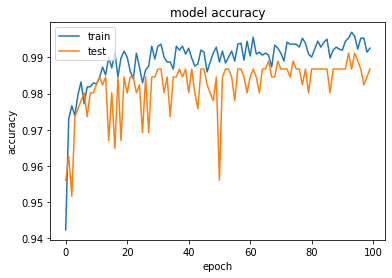

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Loss vs Epochs

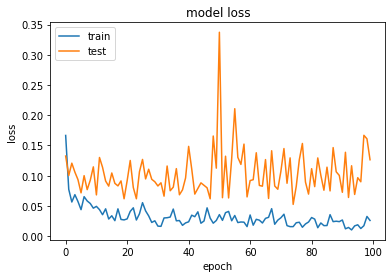

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()